In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib as mpl

In [3]:
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14

In [4]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import random
from nucleaseq.modeling import log10_crispr_specificity

# Model

The main model function here, ```log10_crispr_specificity```, gives the specificity penalty in log space for any of the proteins here modeled: WT, Enh, Hypa, HF1, and Cas12a. All except Cas12a are variants of Cas9. 

The model takes as parameters the protein of interest, the non-target-strand (NTS) DNA PAM sequence, and the aligned, $5^\prime \to 3^\prime$ gRNA and NTS DNA sequences, where insertions and deletions are represented as hyphens. See function docstring (shown below) for details.

Note that the reference PAM sequences are taken to be TGG for all Cas9 variants and TTTA for Cas12a.

Docstring:

```
def log10_crispr_specificity(prot, pam_seq, grna_seq, nts_dna_seq):
    """
    The main model function.
    
    Input:
        prot        :str: The protein to model. Options: WT, Enh, Hypa, HF1, Cas12a
        pam_seq     :str: The NTS PAM sequence with not indels
        grna_seq    :str: The aligned, 5'->3' guide RNA sequence, with insertions as hyphens
        nts_dna_seq :str: The aligned, 5'->3' NTS DNA target sequence (no PAM), with deletions as hyphens
    """
```

# Example

As an example, here we show the modeled specificity of WT Cas9 for all target mismatches, insertions, and deletions from a random sequence.

In [11]:
random.seed(42)
ref_seq = ''.join([random.choice(bases) for _ in range(20)])
color_given_base = {'A': 'blue', 'C': 'darkgoldenrod', 'G': 'green', 'T': 'firebrick'}

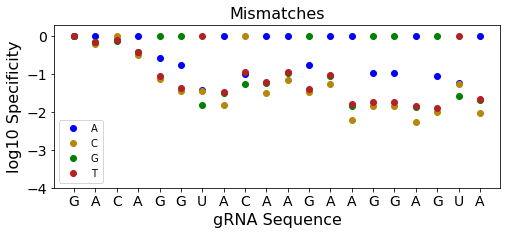

In [12]:
y_given_base = {base: [] for base in bases}
for i in range(20):
    for base in bases:
        nts_dna_seq = ref_seq[:i] + base + ref_seq[i+1:]
        log10_spec = log10_crispr_specificity('WT', 'TGG', ref_seq, nts_dna_seq)
        y_given_base[base].append(log10_spec)
        
fig, ax = plt.subplots(figsize=(8, 3))
x = range(1, 21)
for base in bases:
    ax.plot(x, y_given_base[base], 'o', color=color_given_base[base], label=base)
ax.set_ylim((-data_span - 0.3, 0.3))
ax.legend()
ax.set_xticks(x)
ax.set_xticklabels(list(ref_seq.replace('T', 'U')))
ax.set_xlabel('gRNA Sequence')
ax.set_ylabel('log10 Specificity')
ax.set_title('Mismatches')
print

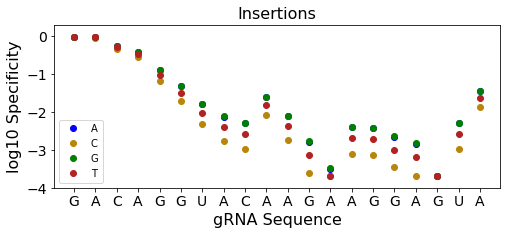

In [13]:
y_given_base = {base: [] for base in bases}
for i in range(20):
    for base in bases:
        new_ref_seq = ref_seq[:i] + '-' + ref_seq[i:]
        nts_dna_seq = ref_seq[:i] + base + ref_seq[i:]
        log10_spec = log10_crispr_specificity('WT', 'TGG', new_ref_seq, nts_dna_seq)
        y_given_base[base].append(log10_spec)
        
fig, ax = plt.subplots(figsize=(8, 3))
x = range(1, 21)
for base in bases:
    ax.plot(x, y_given_base[base], 'o', color=color_given_base[base], label=base)
ax.set_ylim((-data_span - 0.3, 0.3))
ax.legend()
ax.set_xticks(x)
ax.set_xticklabels(list(ref_seq.replace('T', 'U')))
ax.set_xlabel('gRNA Sequence')
ax.set_ylabel('log10 Specificity')
ax.set_title('Insertions')
print

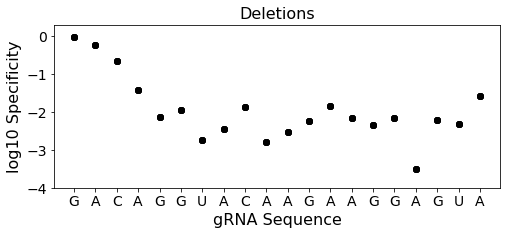

In [14]:
y = []
for i in range(20):
    nts_dna_seq = ref_seq[:i] + '-' + ref_seq[i+1:]
    log10_spec = log10_crispr_specificity('WT', 'TGG', ref_seq, nts_dna_seq)
    y.append(log10_spec)
        
fig, ax = plt.subplots(figsize=(8, 3))
x = range(1, 21)
for base in bases:
    ax.plot(x, y, 'ko')
ax.set_ylim((-data_span - 0.3, 0.3))
ax.set_xticks(x)
ax.set_xticklabels(list(ref_seq.replace('T', 'U')))
ax.set_xlabel('gRNA Sequence')
ax.set_ylabel('log10 Specificity')
ax.set_title('Deletions')
print